In [1]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df
dataset = df.values
dataset
X = dataset[:,0:10]
Y = dataset[:,10]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

model.evaluate(X_test, Y_test)[1]
import matplotlib.pyplot as plt


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


2022-02-18 16:05:37.480254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-18 16:05:37.480308: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-18 16:05:41.266793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-18 16:05:41.276663: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-18 16:05:41.276735: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Z238-UL): /proc/driver/nvidia/version does not exist
2022-02-18 16:05:41.308269: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6774 - accuracy: 0.5372 - val_loss: 0.6741 - val_accuracy: 0.5479
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5753 - val_loss: 0.6695 - val_accuracy: 0.6210
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6311 - val_loss: 0.6648 - val_accuracy: 0.6804
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7074 - val_loss: 0.6599 - val_accuracy: 0.7032
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6996 - val_loss: 0.6550 - val_accuracy: 0.7306
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.7270 - val_loss: 0.6499 - val_accuracy: 0.7443
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.7515 - val_loss: 0.6446 - val_accuracy: 0.7534
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8718 - val_loss: 0.3148 - val_accuracy: 0.8858
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8718 - val_loss: 0.3131 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8728 - val_loss: 0.3105 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8718 - val_loss: 0.3087 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8699 - val_loss: 0.3082 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8718 - val_loss: 0.3045 - val_accuracy: 0.8904
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8728 - val_loss: 0.3033 - val_accuracy: 0.8950
Epoch 

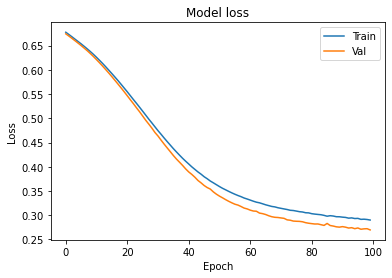

In [2]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


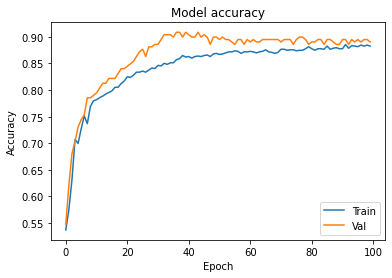

In [3]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [4]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4893 - accuracy: 0.7691 - val_loss: 0.4134 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3504 - accuracy: 0.8581 - val_loss: 0.3170 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.3029 - accuracy: 0.8826 - val_loss: 0.3411 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3114 - accuracy: 0.8845 - val_loss: 0.2924 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2724 - accuracy: 0.8904 - val_loss: 0.2841 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2575 - accuracy: 0.9002 - val_loss: 0.2617 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2637 - accuracy: 0.8904 - val_loss: 0.2581 - val_accuracy: 0.8904
Epoch 

32/32 [==============================] - 1s 22ms/step - loss: 0.1551 - accuracy: 0.9344 - val_loss: 0.2608 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2038 - accuracy: 0.9198 - val_loss: 0.2876 - val_accuracy: 0.9406
Epoch 60/100
32/32 [==============================] - 1s 18ms/step - loss: 0.1724 - accuracy: 0.9227 - val_loss: 0.2891 - val_accuracy: 0.9041
Epoch 61/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1650 - accuracy: 0.9295 - val_loss: 0.3899 - val_accuracy: 0.9087
Epoch 62/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1848 - accuracy: 0.9168 - val_loss: 0.2571 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 1s 18ms/step - loss: 0.1485 - accuracy: 0.9364 - val_loss: 0.3142 - val_accuracy: 0.9178
Epoch 64/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1901 - accuracy: 0.9217 - val_loss: 0.2822 - val_accuracy: 0.9132
Epoch 65/100

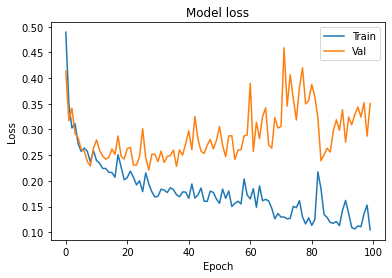

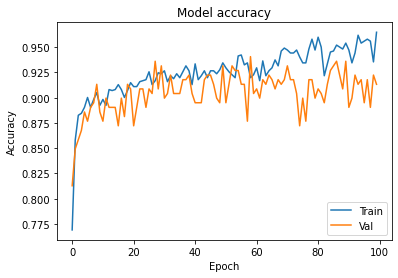

Epoch 1/100
32/32 [==============================] - 2s 35ms/step - loss: 14.2128 - accuracy: 0.6585 - val_loss: 3.8714 - val_accuracy: 0.7260
Epoch 2/100
32/32 [==============================] - 1s 26ms/step - loss: 1.6548 - accuracy: 0.8356 - val_loss: 0.6307 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 26ms/step - loss: 0.5899 - accuracy: 0.8434 - val_loss: 0.5044 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5193 - accuracy: 0.8679 - val_loss: 0.4563 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4834 - accuracy: 0.8777 - val_loss: 0.4474 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4904 - accuracy: 0.8796 - val_loss: 0.4443 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4886 - accuracy: 0.8718 - val_loss: 0.4450 - val_accuracy: 0.8813
Epoch

32/32 [==============================] - 1s 30ms/step - loss: 0.4446 - accuracy: 0.8836 - val_loss: 0.4028 - val_accuracy: 0.8995
Epoch 59/100
32/32 [==============================] - 1s 38ms/step - loss: 0.4503 - accuracy: 0.8708 - val_loss: 0.4311 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4341 - accuracy: 0.8845 - val_loss: 0.4003 - val_accuracy: 0.9087
Epoch 61/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4437 - accuracy: 0.8875 - val_loss: 0.4033 - val_accuracy: 0.9041
Epoch 62/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4272 - accuracy: 0.8845 - val_loss: 0.4075 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4405 - accuracy: 0.8767 - val_loss: 0.5010 - val_accuracy: 0.8447
Epoch 64/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4477 - accuracy: 0.8796 - val_loss: 0.4021 - val_accuracy: 0.9041
Epoch 65/100

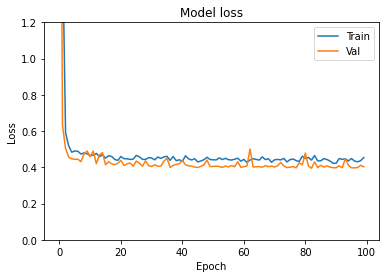

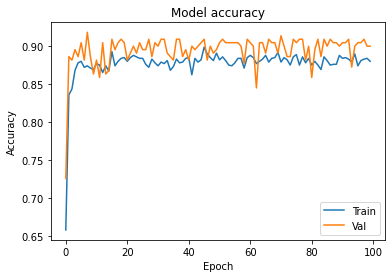

In [5]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
